Objective: Feature engineering for the scraped

In [1]:
import pandas as pd
import numpy as np

In [2]:
###Read the tomatoappended into a dataframe
df = pd.read_csv('tomatoappended.csv')

In [4]:
###Create a main mean data frame  based on a groupby of mainActor
main_mean1 = df.groupby('mainActor').mean().sort_values('theGap', ascending = 0)

In [41]:
###Group the data by main Actor and determine the count
main_mean = df.groupby('mainActor').count().sort_values('realTitle', ascending = 0)

In [51]:
#### create a measure for main actor influence based on main actor movie count
dictionary = {}
for i in range(len(main_mean)):
    key = list(main_mean.index)[i]
    dictionary[key] = main_mean['tomatoCount'][i]
mainInf = []
for i in range(len(df)):
    key = df['mainActor'].iloc[i]
    mainInf.append(dictionary[key])

In [52]:
df['mainInf']= mainInf

Repeat the previous section but for all actors named in the movie

In [7]:
total=df.drop(['supportActor','supportActor1'],1)

In [8]:
total = total.append(df.drop(['mainActor','supportActor1'],1))

C:\Users\quang\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
total = total.append(df.drop(['supportActor','supportActor1'],1))

In [10]:
allActors = list(total['mainActor'][0:11383])+ list(total['supportActor'][11383: 11383*2]) + list(total['mainActor'][11383*2: 11383*3])

In [11]:
len(allActors)

34149

In [12]:
total['allActors']=allActors

In [13]:
total

,audienceCount,audienceScore,cast,criticsConcensus,dataIndex,directedBy,genreString,mainActor,mainInf,rating,realSynopsis,realTitle,runTime,studio,supportActor,theGap,tomatoCount,tomatoMeter,allActors
0,1109209,92,"Tom Hanks, Tim Allen, Don Rickles","Entertaining as it is innovative, Toy Story re...",0,John Lasseter,"Animation, Comedy, Kids & Family",Tom Hanks,123.615385,G,"Woody, a traditional pull-string talking cowbo...",Toy Story,80.0,Buena Vista,NaN,8,89,100,Tom Hanks
1,70136,62,"Jack Lemmon, Walter Matthau, Ann-Margret",NaN,2,Howard Deutch,Comedy,Jack Lemmon,22.571429,PG-13 (adult situations),Once again crusty Matthau and sly Lemmon bring...,Grumpier Old Men,101.0,Warner Home Video,NaN,45,18,17,Jack Lemmon
2,38212,79,"Whitney Houston, Angela Bassett, Lela Rochon",Waiting to Exhale looks at life's ups and down...,3,Forest Whitaker,"Comedy, Drama",Whitney Houston,51.500000,R,"A surprise Hollywood hit, this film is based o...",Waiting to Exhale,123.0,Twentieth Century Fox Home Entertainment,NaN,23,27,56,Whitney Houston
3,221752,94,"Al Pacino, Robert De Niro, Val Kilmer",Though Al Pacino and Robert De Niro share but ...,5,Michael Mann,"Action & Adventure, Mystery & Suspense",Al Pacino,67.241379,"R (adult situations/language, sex, violence)",A successful career criminal considers getting...,Heat,171.0,Warner Bros.,NaN,8,80,86,Al Pacino
4,39481,41,"Jonathan Taylor Thomas, Brad Renfro, Eric Schweig",NaN,7,Peter Hewitt,"Action & Adventure, Kids & Family",Jonathan Taylor Thomas,15.000000,PG,A lot of guys go looking for adventure. For To...,Tom and Huck,92.0,Buena Vista,NaN,16,8,25,Jonathan Taylor Thomas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11378,493,81,"Anthony Lister, Ben Eine, Blek Le Rat",NaN,44662,Colin M. Day,Documentary,Anthony Lister,13.000000,NR,"""Saving Banksy"" is the story of one misguided ...",Saving Banksy,80.0,Parade Deck Films,NaN,19,13,100,Anthony Lister
11379,3490,67,"Lily James, Jai Courtney, Eddie Marsan",The Exception (The Kaiser's Last Kiss) elegant...,44663,David Leveaux,"Art House & International, Drama",Lily James,122.500000,"R (for sexuality, graphic nudity, language and...",A riveting World War II thriller that is fille...,The Exception (The Kaiser's Last Kiss),107.0,A24 and DIRECTV,NaN,8,56,75,Lily James
11380,58805,58,"Denzel Washington, Eva Mendes, Sanaa Lathan",A fun and stylish thriller if you can get past...,44666,Carl Franklin,"Action & Adventure, Drama, Mystery & Suspense",Denzel Washington,135.958333,"PG-13 (for sexual content, violence and some l...",Director Carl Franklin and actor Denzel Washin...,Out of Time,114.0,MGM/UA,NaN,6,149,64,Denzel Washington
11381,3491,41,"Seann William Scott, Alison Pill, Marc-Andre G...",Seann William Scott remains as watchable as ev...,44674,Jay Baruchel,Comedy,Seann William Scott,55.600000,"R (for pervasive language, crude sexual conten...","After one too many injuries, hockey enforcer D...",Goon: Last of the Enforcers,NaN,Momentum Pictures,NaN,1,59,42,Seann William Scott


In [14]:
###Group the total data frame by actor to determine the actor count
main_mean = total.groupby('allActors').count().sort_values('realTitle', ascending = 0)

In [15]:
main_mean

,audienceCount,audienceScore,cast,criticsConcensus,dataIndex,directedBy,genreString,mainActor,mainInf,rating,realSynopsis,realTitle,runTime,studio,supportActor,theGap,tomatoCount,tomatoMeter
allActors,,,,,,,,,,,,,,,,,,
Nicolas Cage,74,74,74,68,74,74,74,74,74,74,74,74,74,74,0,74,74,74
Clint Eastwood,72,72,72,44,72,72,72,72,72,72,72,72,72,72,0,72,72,72
Bruce Willis,68,68,68,62,68,68,68,68,68,68,68,68,68,68,0,68,68,68
Johnny Depp,66,66,66,66,66,66,66,66,66,66,66,66,66,66,0,66,66,66
Robert De Niro,60,60,60,50,60,60,60,60,60,60,60,60,60,60,0,60,60,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Natalie Trundy,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Natalie Talmadge,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1
Natalie Prosin,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [40]:
#### create a measure all actor influence based the number of movies actors have been in
dicta = {}
for i in range(len(main_mean)):
    key = list(main_mean.index)[i]
    dicta[key] = main_mean['audienceCount'][i]
totalInf = []
for i in range(len(total)):
    if type(total['allActors'].iloc[i]) != float:
        key = total['allActors'].iloc[i]
        totalInf.append(dicta[key])
    else:
        totalInf.append(0)

In [38]:
type(total.iloc[19585]['allActors'])

float

In [45]:
count = []
for i in range(len(df)):
    count.append(totalInf[i] + totalInf[i+len(df)] + totalInf[i+len(df)*2])
    

In [48]:
df['totalInf']= count

In [53]:
df[df['totalInf']==164]

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,directedBy,studio,runTime,cast,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf
5760,11634,Next,Numerous plot holes and poorly motivated chara...,28,130,53,339613,A man with the ability to see the future and c...,PG-13 (for intense sequences of violent action...,"Mystery & Suspense, Science Fiction & Fantasy",Lee Tamahori,Paramount Pictures,96.0,"Nicolas Cage, Julianne Moore, Jessica Biel",Nicolas Cage,Julianne Moore,Jessica Biel,25,37,164


Now let's do the samething for directors

In [54]:
director_count = df.groupby('directedBy').count().sort_values('realTitle', ascending = 0)

In [57]:
df.head()

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,directedBy,studio,runTime,cast,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf
0,0,Toy Story,"Entertaining as it is innovative, Toy Story re...",100,89,92,1109209,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",John Lasseter,Buena Vista,80.0,"Tom Hanks, Tim Allen, Don Rickles",Tom Hanks,Tim Allen,Don Rickles,8,26,109
1,2,Grumpier Old Men,NaN,17,18,62,70136,Once again crusty Matthau and sly Lemmon bring...,PG-13 (adult situations),Comedy,Howard Deutch,Warner Home Video,101.0,"Jack Lemmon, Walter Matthau, Ann-Margret",Jack Lemmon,Walter Matthau,Ann-Margret,45,14,63
2,3,Waiting to Exhale,Waiting to Exhale looks at life's ups and down...,56,27,79,38212,"A surprise Hollywood hit, this film is based o...",R,"Comedy, Drama",Forest Whitaker,Twentieth Century Fox Home Entertainment,123.0,"Whitney Houston, Angela Bassett, Lela Rochon",Whitney Houston,Angela Bassett,Lela Rochon,23,2,15
3,5,Heat,Though Al Pacino and Robert De Niro share but ...,86,80,94,221752,A successful career criminal considers getting...,"R (adult situations/language, sex, violence)","Action & Adventure, Mystery & Suspense",Michael Mann,Warner Bros.,171.0,"Al Pacino, Robert De Niro, Val Kilmer",Al Pacino,Robert De Niro,Val Kilmer,8,29,135
4,7,Tom and Huck,NaN,25,8,41,39481,A lot of guys go looking for adventure. For To...,PG,"Action & Adventure, Kids & Family",Peter Hewitt,Buena Vista,92.0,"Jonathan Taylor Thomas, Brad Renfro, Eric Schweig",Jonathan Taylor Thomas,Brad Renfro,Eric Schweig,16,2,12


In [60]:
#### create a measure all actor influence based the number of movies actors have been in
directorInf =[]
dictionary = {}
for i in range(len(director_count)):
    key = list(director_count.index)[i]
    dictionary[key] = director_count['realTitle'][i]
totalInf = []
for i in range(len(df)):
    if type(df['directedBy'].iloc[i]) != float:
        key = df['directedBy'].iloc[i]
        directorInf.append(dictionary[key])
    else:
        directorInf.append(0)

In [61]:
df['directorInf'] = directorInf

In [63]:
df.head()

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,...,studio,runTime,cast,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf,directorInf
0,0,Toy Story,"Entertaining as it is innovative, Toy Story re...",100,89,92,1109209,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",...,Buena Vista,80.0,"Tom Hanks, Tim Allen, Don Rickles",Tom Hanks,Tim Allen,Don Rickles,8,26,109,2
1,2,Grumpier Old Men,NaN,17,18,62,70136,Once again crusty Matthau and sly Lemmon bring...,PG-13 (adult situations),Comedy,...,Warner Home Video,101.0,"Jack Lemmon, Walter Matthau, Ann-Margret",Jack Lemmon,Walter Matthau,Ann-Margret,45,14,63,6
2,3,Waiting to Exhale,Waiting to Exhale looks at life's ups and down...,56,27,79,38212,"A surprise Hollywood hit, this film is based o...",R,"Comedy, Drama",...,Twentieth Century Fox Home Entertainment,123.0,"Whitney Houston, Angela Bassett, Lela Rochon",Whitney Houston,Angela Bassett,Lela Rochon,23,2,15,4
3,5,Heat,Though Al Pacino and Robert De Niro share but ...,86,80,94,221752,A successful career criminal considers getting...,"R (adult situations/language, sex, violence)","Action & Adventure, Mystery & Suspense",...,Warner Bros.,171.0,"Al Pacino, Robert De Niro, Val Kilmer",Al Pacino,Robert De Niro,Val Kilmer,8,29,135,6
4,7,Tom and Huck,NaN,25,8,41,39481,A lot of guys go looking for adventure. For To...,PG,"Action & Adventure, Kids & Family",...,Buena Vista,92.0,"Jonathan Taylor Thomas, Brad Renfro, Eric Schweig",Jonathan Taylor Thomas,Brad Renfro,Eric Schweig,16,2,12,6


Clean up the rating strings and separate the "(  )" string from the ratings

In [64]:
###reason for ratings
rateStrings = []
for i in range(len(df)):
    if '(' in df['rating'].iloc[i]:
        rateStrings.append(df['rating'][i][df['rating'].iloc[i].find('('):len(df['rating'].iloc[i])])
    else:
        rateStrings.append('N/A')
    

In [65]:
df['rateStrings']=rateStrings

In [66]:
df.head()

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,...,runTime,cast,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf,directorInf,rateStrings
0,0,Toy Story,"Entertaining as it is innovative, Toy Story re...",100,89,92,1109209,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",...,80.0,"Tom Hanks, Tim Allen, Don Rickles",Tom Hanks,Tim Allen,Don Rickles,8,26,109,2,N/A
1,2,Grumpier Old Men,NaN,17,18,62,70136,Once again crusty Matthau and sly Lemmon bring...,PG-13 (adult situations),Comedy,...,101.0,"Jack Lemmon, Walter Matthau, Ann-Margret",Jack Lemmon,Walter Matthau,Ann-Margret,45,14,63,6,(adult situations)
2,3,Waiting to Exhale,Waiting to Exhale looks at life's ups and down...,56,27,79,38212,"A surprise Hollywood hit, this film is based o...",R,"Comedy, Drama",...,123.0,"Whitney Houston, Angela Bassett, Lela Rochon",Whitney Houston,Angela Bassett,Lela Rochon,23,2,15,4,N/A
3,5,Heat,Though Al Pacino and Robert De Niro share but ...,86,80,94,221752,A successful career criminal considers getting...,"R (adult situations/language, sex, violence)","Action & Adventure, Mystery & Suspense",...,171.0,"Al Pacino, Robert De Niro, Val Kilmer",Al Pacino,Robert De Niro,Val Kilmer,8,29,135,6,"(adult situations/language, sex, violence)"
4,7,Tom and Huck,NaN,25,8,41,39481,A lot of guys go looking for adventure. For To...,PG,"Action & Adventure, Kids & Family",...,92.0,"Jonathan Taylor Thomas, Brad Renfro, Eric Schweig",Jonathan Taylor Thomas,Brad Renfro,Eric Schweig,16,2,12,6,N/A


In [67]:
for i in range(len(df)):
    if '(' in df['rating'].iloc[i]:
        df['rating'][i]=df['rating'][i].replace(df['rating'][i][df['rating'].iloc[i].find('('):len(df['rating'].iloc[i])], '')
   

C:\Users\quang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
df['rating'].unique()

array(['G', 'PG-13 ', 'R', 'R ', 'PG', 'PG-13', 'NR', 'NC17 ', 'PG ',
       'NR ', 'NC17', 'G '], dtype=object)

Create a numerical movie rating feature

In [70]:
numRating = []
for i in range(len(df)):
    if 'G' == df['rating'][i] or 'G ' == df['rating'][i]:
        numRating.append(0)
    if 'PG' == df['rating'][i] or 'PG ' == df['rating'][i]:
        numRating.append(1)
    if 'PG-13' == df['rating'][i] or 'PG-13 ' in df['rating'][i]:
        numRating.append(2)
    if 'R' == df['rating'][i] or 'R '==df['rating'][i]:
        numRating.append(3)
    if 'NC17' in df['rating'][i] or 'NC17 ' in df['rating'][i]:
        numRating.append(4)
    if 'NR' == df['rating'][i] or 'NR ' == df['rating'][i]:
        numRating.append(10)

In [71]:
len(numRating)

11383

In [72]:
df['numRating']=numRating

In [75]:
for i in range(len(df)):
    if 'G' == df['rating'][i] or 'G ' == df['rating'][i]:
        df['rating'][i] = 'G'
    if 'PG' == df['rating'][i] or 'PG ' == df['rating'][i]:
        df['rating'][i] = 'PG'
    if 'PG-13' == df['rating'][i] or 'PG-13 ' in df['rating'][i]:
        df['rating'][i] = 'PG-13'
    if 'R' == df['rating'][i] or 'R '==df['rating'][i]:
        df['rating'][i] = 'R'
    if 'NC17' in df['rating'][i] or 'NC17 ' in df['rating'][i]:
        df['rating'][i] = 'NC17'
    if 'NR' == df['rating'][i] or 'NR ' == df['rating'][i]:
        df['rating'][i] = 'NR'

C:\Users\quang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\quang\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\quang\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name

In [79]:
###Create a measure for the length of the synopsis
synopLen = []
for i in range(len(df)):
    if type(df['realSynopsis'][i])== str:
        synopLen.append(len(df['realSynopsis'][i].split()))
    else:
        synopLen.append(float('nan'))
df['synopsisLength'] = synopLen

In [80]:
df.head()

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,...,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf,directorInf,rateStrings,numRating,synopsisLength
0,0,Toy Story,"Entertaining as it is innovative, Toy Story re...",100,89,92,1109209,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",...,Tom Hanks,Tim Allen,Don Rickles,8,26,109,2,N/A,0,157.0
1,2,Grumpier Old Men,NaN,17,18,62,70136,Once again crusty Matthau and sly Lemmon bring...,PG-13,Comedy,...,Jack Lemmon,Walter Matthau,Ann-Margret,45,14,63,6,(adult situations),2,180.0
2,3,Waiting to Exhale,Waiting to Exhale looks at life's ups and down...,56,27,79,38212,"A surprise Hollywood hit, this film is based o...",R,"Comedy, Drama",...,Whitney Houston,Angela Bassett,Lela Rochon,23,2,15,4,N/A,3,201.0
3,5,Heat,Though Al Pacino and Robert De Niro share but ...,86,80,94,221752,A successful career criminal considers getting...,R,"Action & Adventure, Mystery & Suspense",...,Al Pacino,Robert De Niro,Val Kilmer,8,29,135,6,"(adult situations/language, sex, violence)",3,258.0
4,7,Tom and Huck,NaN,25,8,41,39481,A lot of guys go looking for adventure. For To...,PG,"Action & Adventure, Kids & Family",...,Jonathan Taylor Thomas,Brad Renfro,Eric Schweig,16,2,12,6,N/A,1,180.0


In [81]:
pd.DataFrame.to_csv(df,'data_current.csv')

Explore the top 500 actors to determine some interesting stuff about their films

In [39]:
topActor = []
for i in range(0, 500):
    topActor.append(main_mean[0: 500].index[i])

In [40]:
topActor

['Nicolas Cage',
 'Clint Eastwood',
 'Bruce Willis',
 'Johnny Depp',
 'Robert De Niro',
 'Sylvester Stallone',
 'Al Pacino',
 'John Wayne',
 'Tom Cruise',
 'John Cusack',
 'Robin Williams',
 'Tom Hanks',
 'Michael Caine',
 'Burt Lancaster',
 'Keanu Reeves',
 'Kevin Costner',
 'John Travolta',
 'Woody Allen',
 'Jeff Bridges',
 'Adam Sandler',
 'Paul Newman',
 'Nick Nolte',
 'Sean Connery',
 'Denzel Washington',
 'Dennis Quaid',
 'Meryl Streep',
 'Richard Gere',
 'Ben Affleck',
 'Arnold Schwarzenegger',
 'Ethan Hawke',
 'Samuel L. Jackson',
 'Ben Stiller',
 'Jack Nicholson',
 'Steve Martin',
 'Michael Keaton',
 'Marlon Brando',
 'Nicole Kidman',
 'Leonardo DiCaprio',
 'Mel Gibson',
 'George Clooney',
 'Christian Bale',
 'Burt Reynolds',
 'Ewan McGregor',
 'Kevin Bacon',
 'Liam Neeson',
 'Sean Penn',
 'Eddie Murphy',
 'Robert Redford',
 'Julia Roberts',
 'Jean-Claude Van Damme',
 'Michael Douglas',
 'Anthony Hopkins',
 'James Franco',
 'Cary Grant',
 'Harrison Ford',
 'Kurt Russell',
 'Na

In [41]:
data = pd.DataFrame()

In [42]:
for i in range(0, len(df)):
    for name in range(0, len(topActor)):
        if topActor[name] == df['mainActor'].iloc[i]:
            data=data.append(df.iloc[i])
            break

In [43]:
count = data.groupby('mainActor').count()['dataIndex']

In [44]:
groupActor = data.groupby('mainActor').mean()

In [45]:
groupActor['count']=count

In [46]:
groupActor.sort_values('theGap', ascending=0)

,audienceCount,audienceScore,dataIndex,mainInf,numRating,runTime,theGap,tomatoCount,tomatoMeter,totalInf,count
mainActor,,,,,,,,,,,
Tyler Perry,72673.700000,73.200000,20383.100000,52.100000,2.000000,109.300000,42.700000,52.100000,30.500000,20.0,10
Ice Cube,103371.363636,64.636364,9955.818182,78.454545,2.454545,97.272727,33.000000,78.454545,35.818182,22.0,11
Martin Lawrence,215857.900000,52.300000,10246.900000,80.500000,1.800000,98.000000,32.500000,80.500000,19.800000,20.0,10
Macaulay Culkin,405420.600000,63.200000,4533.400000,59.200000,1.800000,105.000000,31.400000,59.200000,31.800000,10.0,5
Gerard Butler,236945.000000,62.833333,20604.166667,140.083333,2.500000,119.166667,30.833333,140.083333,32.000000,24.0,12
...,...,...,...,...,...,...,...,...,...,...,...
Don Cheadle,112084.833333,70.333333,17299.833333,170.333333,2.333333,115.166667,6.000000,170.333333,72.333333,12.0,6
Judi Dench,35763.333333,74.666667,14053.833333,139.833333,2.000000,103.500000,5.166667,139.833333,77.500000,12.0,6
William Shatner,51555.875000,62.125000,2151.500000,38.750000,1.125000,111.125000,5.125000,38.750000,65.500000,16.0,8


In [47]:
df.head()

,dataIndex,realTitle,criticsConcensus,tomatoMeter,tomatoCount,audienceScore,audienceCount,realSynopsis,rating,genreString,...,runTime,cast,mainActor,supportActor,supportActor1,theGap,mainInf,totalInf,rateStrings,numRating
0,0,Toy Story,"Entertaining as it is innovative, Toy Story re...",100,89,92,1109209,"Woody, a traditional pull-string talking cowbo...",G,"Animation, Comedy, Kids & Family",...,80.0,"Tom Hanks, Tim Allen, Don Rickles",Tom Hanks,Tim Allen,Don Rickles,8,123.615385,52,N/A,0
1,2,Grumpier Old Men,NaN,17,18,62,70136,Once again crusty Matthau and sly Lemmon bring...,PG-13,Comedy,...,101.0,"Jack Lemmon, Walter Matthau, Ann-Margret",Jack Lemmon,Walter Matthau,Ann-Margret,45,22.571429,28,(adult situations),2
2,3,Waiting to Exhale,Waiting to Exhale looks at life's ups and down...,56,27,79,38212,"A surprise Hollywood hit, this film is based o...",R,"Comedy, Drama",...,123.0,"Whitney Houston, Angela Bassett, Lela Rochon",Whitney Houston,Angela Bassett,Lela Rochon,23,51.500000,4,N/A,3
3,5,Heat,Though Al Pacino and Robert De Niro share but ...,86,80,94,221752,A successful career criminal considers getting...,R,"Action & Adventure, Mystery & Suspense",...,171.0,"Al Pacino, Robert De Niro, Val Kilmer",Al Pacino,Robert De Niro,Val Kilmer,8,67.241379,58,"(adult situations/language, sex, violence)",3
4,7,Tom and Huck,NaN,25,8,41,39481,A lot of guys go looking for adventure. For To...,PG,"Action & Adventure, Kids & Family",...,92.0,"Jonathan Taylor Thomas, Brad Renfro, Eric Schweig",Jonathan Taylor Thomas,Brad Renfro,Eric Schweig,16,15.000000,4,N/A,1


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns


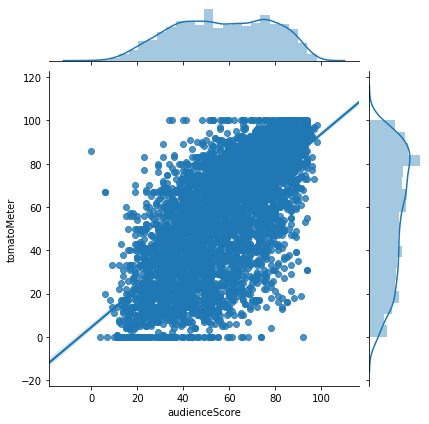

In [87]:
sns.jointplot(x='audienceScore', y='tomatoMeter', data=df[df['rating']=='R'], kind= "reg")

In [89]:
df['rating'].unique()

array(['G', 'PG-13', 'R', 'PG', 'NR', 'NC17'], dtype=object)

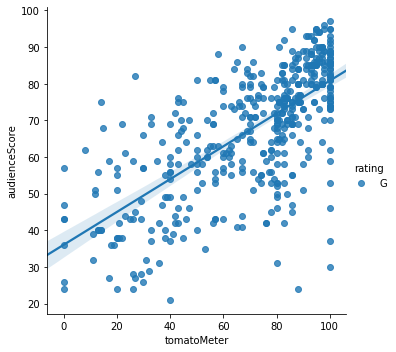

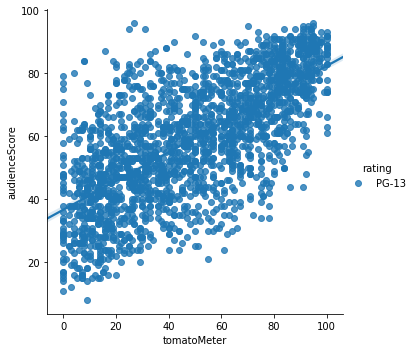

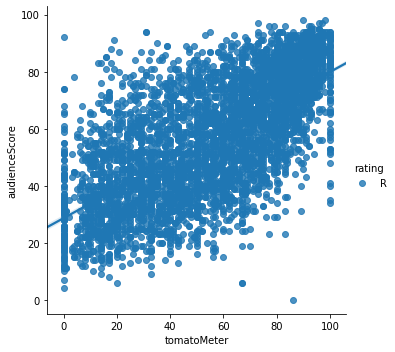

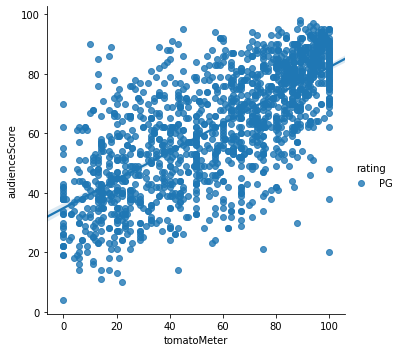

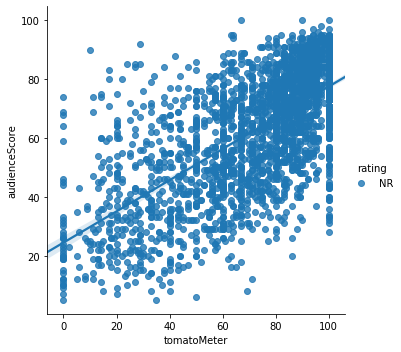

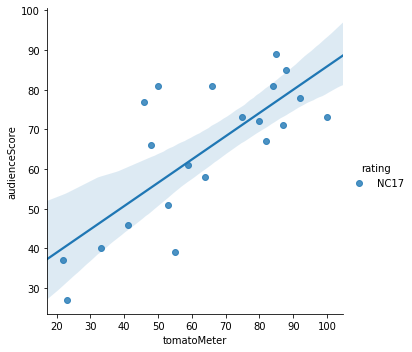

In [102]:
for rating in df['rating'].unique():
    sns.lmplot(x='tomatoMeter', y='audienceScore', data=df[df['rating']==rating], hue='rating')

